# MOwNiT 

# Laboratorium 4

## Interpolacja Hermite'a

Interpolacja Hermite’a umożliwia znalezienie wielomianu interpolacyjnego zadanej funkcji w przypadku, gdy oprócz wartości funkcji w pewnych punktach $x_1,...,x_n$ dane są również wartości jej pochodnych, tzn. znamy

$$f(x_{1}),f(x_{2}),\ldots ,f(x_{n})$$

oraz

$$f'(x_{1}),\ldots ,f^{(k_{1})}(x_{1}),f'(x_2),\ldots,f^{(k_2)}(x_2)\ldots ,f'(x_{n}),\ldots ,f^{(k_{n})}(x_{n})$$

Jeżeli w danym punkcie $x_j$ znamy wyłącznie wartość funkcji, to punkt $(x_j,f(x_j))$ nazywamy *węzłem jednokrotnym*, natomiast jeżeli znamy wartości pochodnych aż do $k$-tej włącznie, to punkt $(x_j,f(x_j))$ nazywamy *węzłem $k+1$ krotnym*.

### Algorytm - teoria

Konstruujemy macierz węzłów w taki sposób, że węzęł $k$-krotny powtarzamy dokładnie $k$ razy:

$$\left[\begin{array}{c}
x_1&f(x_1)\\
x_1&f(x_1)\\
x_1&f(x_1)\\
\vdots\\
x_1&f(x_1)\\
x_2&f(x_2)\\
x_2&f(x_2)\\
\vdots\\
x_2&f(x_2)\\
\vdots\\
x_n&f(x_n)\\
x_n&f(x_n)\\
\vdots\\
x_n&f(x_n)
\end{array}\right]$$

Następnie uzupełniamy naszą macierz o kolejną kolumnę zawierającą *różnice dzielone pierwszego rzędu*$$f[x_{i-1},x_{i}]:=\frac{f(x_{i})-f(x_{i-1})}{x_{i}-x_{i-1}}.$$ Tam, gdzie nie możemy obliczyć różnicy dzielonej (obecny i poprzedni punkt jest taki sam) wstawiamy $$\frac{f'(x_i)}{1!}.$$

$$\left[\begin{array}{cc}
x_1&f(x_1)&-\\
x_1&f(x_1)&f'(x_1)\\
x_1&f(x_1)&f'(x_1)\\
\vdots&\vdots\\
x_1&f(x_1)&f'(x_1)\\
x_2&f(x_2)&f[x_1,x_2]\\
x_2&f(x_2)&f'(x_2)\\
\vdots&\vdots\\
x_2&f(x_2)&f'(x_2)\\
\vdots&\vdots\\
x_n&f(x_n)&f[x_{n-1},x_n]\\
x_n&f(x_n)&f'(x_n)\\
\vdots&\vdots\\
x_n&f(x_n)&f'(x_n)
\end{array}\right]$$

W kolejnym kroku uzupełniamy macierz o kolumnę *różnic dzielonych drugiego rzędu* $$f[x_{i-2},x_{i-1},x_i]=\frac{f[x_{i-1},x_i]-f[x_{i-2},x_{i-1}]}{x_i-x_{i-2}}$$

Jeżeli $f[x_{i-1},x_i]$ lub $f[x_{i-2},x_{i-1}]$ nie istniała, to do wzoru wstawiamy zastępującą ją pochodną.

Jeżeli nie jesteśmy wstanie obliczyć różnicy dzielonej drugiego rzędu (dwa poprzednie punkty są takie same, jak aktualny), to wstawiamy $$\frac{f''(x_i)}{2!}.$$

$$\left[\begin{array}{ccc}
x_1&f(x_1)&-&-\\
x_1&f(x_1)&f'(x_1)&-\\
x_1&f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}\\
\vdots&\vdots&\vdots\\
x_1&f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}\\
x_2&f(x_2)&f[x_1,x_2]&f[x_1,x_1,x_2]\\
x_2&f(x_2)&f'(x_2)&f[x_1,x_2,x_2]\\
\vdots&\vdots&\vdots\\
x_2&f(x_2)&f'(x_2)&\frac{f''(x_1)}{2}\\
\vdots&\vdots&\vdots\\
x_n&f(x_n)&f[x_{n-1},x_n]&f[x_{n-1},x_{n-1},x_n]\\
x_n&f(x_n)&f'(x_n)&f[x_{n-1},x_n,x_n]\\
\vdots&\vdots&\vdots\\
x_n&f(x_n)&f'(x_n)&\frac{f''(x_1)}{2}
\end{array}\right]$$

Kontynuujemy rekurencyjnie obliczając kolejne *różnice dzielone $k$-tego rzędu* $$f[x_{i-k},x_{i-k+1},...,x_i]=\frac{f[x_{i-k+1},...,x_i]-f[x_{i-k},x_{i-k+1},...,x_{i-1}]}{x_i-x_{i-k}}$$

pamiętając o zastąpieniu wyrażeń nieistniejących wyrażeniami z pochodnymi dzielonymi przez $(k-1)!$ a tam, gdzie mianownik byłby równy zero wstawiamy zamiast nich $$\frac{f^{(k)}(x_i)}{k!}$$.

Po zakończeniu algorytmu otrzymujemy macierz, która po opuszczeniu kolumny zawierającej $x_i$ jest macierzą  kwadratową

$$H=\left[\begin{array}{ccccc}
f(x_1)&-&-&\cdots&-\\
f(x_1)&f'(x_1)&-&\cdots&-\\
f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_1)&f'(x_1)&\frac{f''(x_1)}{2}&\cdots&-\\
f(x_2)&f[x_1,x_2]&f[x_1,x_1,x_2]&\cdots&-\\
f(x_2)&f'(x_2)&f[x_1,x_2,x_2]&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_2)&f'(x_2)&\frac{f''(x_1)}{2}&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_n)&f[x_{n-1},x_n]&f[x_{n-1},x_{n-1},x_n]&\cdots&-\\
f(x_n)&f'(x_n)&f[x_{n-1},x_n,x_n]&\cdots&-\\
\vdots&\vdots&\vdots&\cdots&-\\
f(x_n)&f'(x_n)&\frac{f''(x_1)}{2}&\cdots&f[x_1,...,x_n]
\end{array}\right]$$

Wielomian interpolacyjny Hermite'a ma postać $$W(x)=\sum _{i=1}^{m}a_{i}\prod _{j=1}^{i-1}(x-x_{j}),$$



gdzie współczynniki $a_i$ są wyrazami na przekątnej macierzy $H$ a $m$ jest liczbą węzłów liczoną wraz z ich krotnościami.

### Przykład

Mamy dane

|x_i| f(x_i) |f'(x_i)|f''(x_i)|
|-|-|-|-|
|2 |4 |4 |2|
|3 |9  |  |

Układamy macierz węzłów powtórzonych zgodnie z ich krotnością

$$\left[\begin{array}{c}
2&4\\
2&4\\
2&4\\
3&9
\end{array}\right]$$

Uzupełniamy o różnice dzielone pierwszego rzędu (lub wartości pierwszej pochodnej)

$$\left[\begin{array}{ccc}
2&4&-\\
2&4&4\\
2&4&4\\
3&9&5
\end{array}\right]$$

...drugiego rzędu...

$$\left[\begin{array}{cccc}
2&4&-&-\\
2&4&4&-\\
2&4&4&1\\
3&9&5&1
\end{array}\right]$$

...trzeciego rzędu...

$$\left[\begin{array}{ccccc}
2&4&-&-&-\\
2&4&4&-&-\\
2&4&4&1&-\\
3&9&5&1&0
\end{array}\right]$$

Otrzymujemy wielomian Hermite'a $$W(x)=4+4(x-2)+(x-2)(x-2)+0\cdot(x-2)(x-2)(x-2)$$

### Algorytm - praktyka

Załóżmy, że mamy dane punkty $x_0,...,x_n$, wartości funkcji $y_0,...,y_n$ oraz wartości pierwszej pochodnej $p_0,...,p_n$.

#### START

Tworzymy macierz A wymiaru $(2n+1)\times(2n+1)$ wypełnioną zerami i zerowy wektor pomocniczy $b$ o długości $2n+1$.

#### Krok 1

Dla $i=0,...,n$ wykonujemy:

- $b_{2i}=x_i$
- $b_{2i+1}=x_i$
- $A_{2i,0}=y_i$
- $A_{2i+1,0}=y_i$
- $A_{2i+1,1}=p_i$
- jeżeli $i\neq 0$ to $$A_{2i,1}=\frac{A_{2i,0}-A_{2i-1,0}}{b_{2i}-b_{2i-1}}$$

#### Krok 2

Dla $i=2,...,2n+1$ wykonujemy:

dla $j=2,...,i$ wykonujemy: $$A_{i,j}=\frac{A_{i,j-1}-A_{i-1,j-1}}{b_i-b_{i-j}}$$

#### Krok 3

Zwracamy wektor współczyników $A_{0,0},A_{1,1},...,A_{2n+1,2n+1}$ i konstuujemy wielomian $$W(x)=\sum _{i=0}^{2n+1}A_{i,i}\prod _{j=0}^{i-1}(x-x_{j}),$$

#### STOP

W `scikit.interpolation` funkcja `CubicHermiteSpline` znajduje wielomian interpolacyjny Hermite'a dla pierwszych pochodnych. W przypadku gdy dane są również wartości wyższych pochodnych wielomian interpolacyjny znajduje funkcja `BPoly.from_derivatives`.

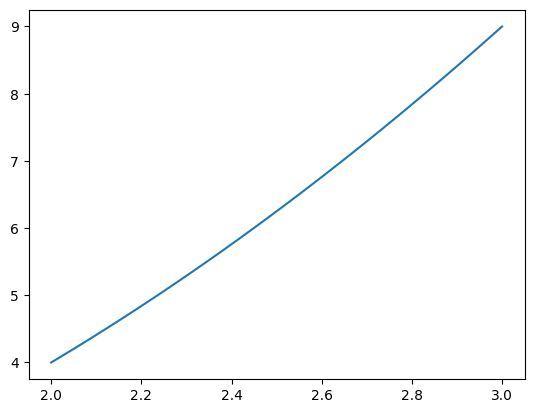

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as si

hermite=si.BPoly.from_derivatives([2, 3], [[4, 4, 2], [9]] )

xpp=np.linspace(2,3,100)
plt.plot(xpp,hermite.__call__(xpp))

### Zadanie 1. (3 pkt)

Zaimplementować algorytm interpolacji Hermitte'a. Przetestować go na przykładowych danych wejściowych (mogą być powyższe) i porównać z działaniem funkcji z `scipy`.

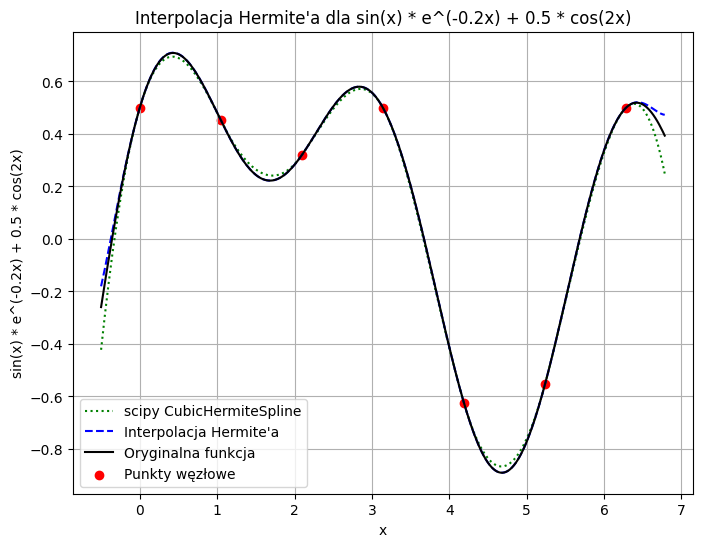

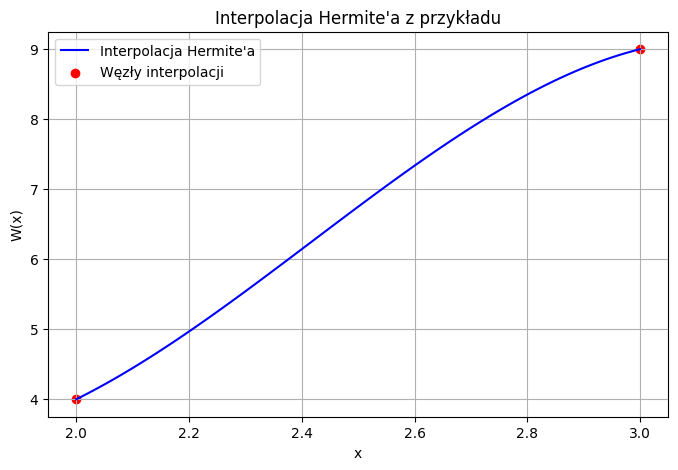

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicHermiteSpline

def hermite_interpolation(x, y, dy, x_eval):
    """
    Implementacja interpolacji Hermite'a przy użyciu tablicy różnic dzielonych Newtona.
    :param x: Węzły interpolacji
    :param y: Wartości funkcji w węzłach
    :param dy: Pochodne funkcji w węzłach
    :param x_eval: Punkty, w których oceniamy interpolację
    :return: Wartości interpolowanego wielomianu w punktach x_eval
    """
    n = len(x)
    z = np.zeros(2 * n)
    Q = np.zeros((2 * n, 2 * n))
    
    for i in range(n):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
        Q[2*i, 0] = y[i]
        Q[2*i+1, 0] = y[i]
        Q[2*i+1, 1] = dy[i]
        if i != 0:
            Q[2*i, 1] = (Q[2*i, 0] - Q[2*i-1, 0]) / (z[2*i] - z[2*i-1])
    
    for i in range(2, 2*n):
        for j in range(2, i+1):
            Q[i, j] = (Q[i, j-1] - Q[i-1, j-1]) / (z[i] - z[i-j])
    
    def hermite_poly(t):
        result = 0
        for i in range(2*n):
            term = Q[i, i]
            product = 1.0
            for j in range(i):
                product *= (t - z[j])
            result += term * product
        return result
    
    return np.array([hermite_poly(t) for t in x_eval])

# Przykładowe dane dla bardziej skomplikowanej funkcji f(x) = sin(x) * e^(-0.2x) + 0.5 * cos(2x)
x = np.linspace(0, 2*np.pi, 7)
y = np.sin(x) * np.exp(-0.2*x) + 0.5 * np.cos(2*x)
dy = np.exp(-0.2*x) * (np.cos(x) - 0.2 * np.sin(x)) - np.sin(2*x)

x_eval = np.linspace(-0.5, 2*np.pi + 0.5, 300)
hermite_values = hermite_interpolation(x, y, dy, x_eval)

# Porównanie z scipy CubicHermiteSpline
spline = CubicHermiteSpline(x, y, dy)
scipy_values = spline(x_eval)

# Wykres porównawczy
plt.figure(figsize=(8, 6))
plt.plot(x_eval, scipy_values, label="scipy CubicHermiteSpline", linestyle=':', color='green')
plt.plot(x_eval, hermite_values, label="Interpolacja Hermite'a", linestyle='--', color='blue')
plt.plot(x_eval, np.sin(x_eval) * np.exp(-0.2*x_eval) + 0.5 * np.cos(2*x_eval), label="Oryginalna funkcja", linestyle='-', color='black')
plt.scatter(x, y, color='red', label='Punkty węzłowe')
plt.legend()
plt.xlabel('x')
plt.ylabel('sin(x) * e^(-0.2x) + 0.5 * cos(2x)')
plt.title("Interpolacja Hermite'a dla sin(x) * e^(-0.2x) + 0.5 * cos(2x)")
plt.grid()
plt.show()

#
# Dane do interpolacji Hermite'a
x_nodes = np.array([2, 3])
y_values = np.array([4, 9])
dy_values = np.array([4, 2])

# Punkty do oceny interpolacji
x_eval = np.linspace(2, 3, 100)
y_hermite = hermite_interpolation(x_nodes, y_values, dy_values, x_eval)

# Wykres interpolacji Hermite'a
plt.figure(figsize=(8, 5))
plt.plot(x_eval, y_hermite, label="Interpolacja Hermite'a", color='b')
plt.scatter(x_nodes, y_values, color='r', label="Węzły interpolacji")
plt.xlabel("x")
plt.ylabel("W(x)")
plt.title("Interpolacja Hermite'a - przykładowe prostsze dane")
plt.legend()
plt.grid(True)

### Zadanie 2. (2 pkt)
Na przykładzie dowolnej metody interpolacji zobrazować graficznie i wyjaśnić czytelnikowi tzw. efekt Rungego.

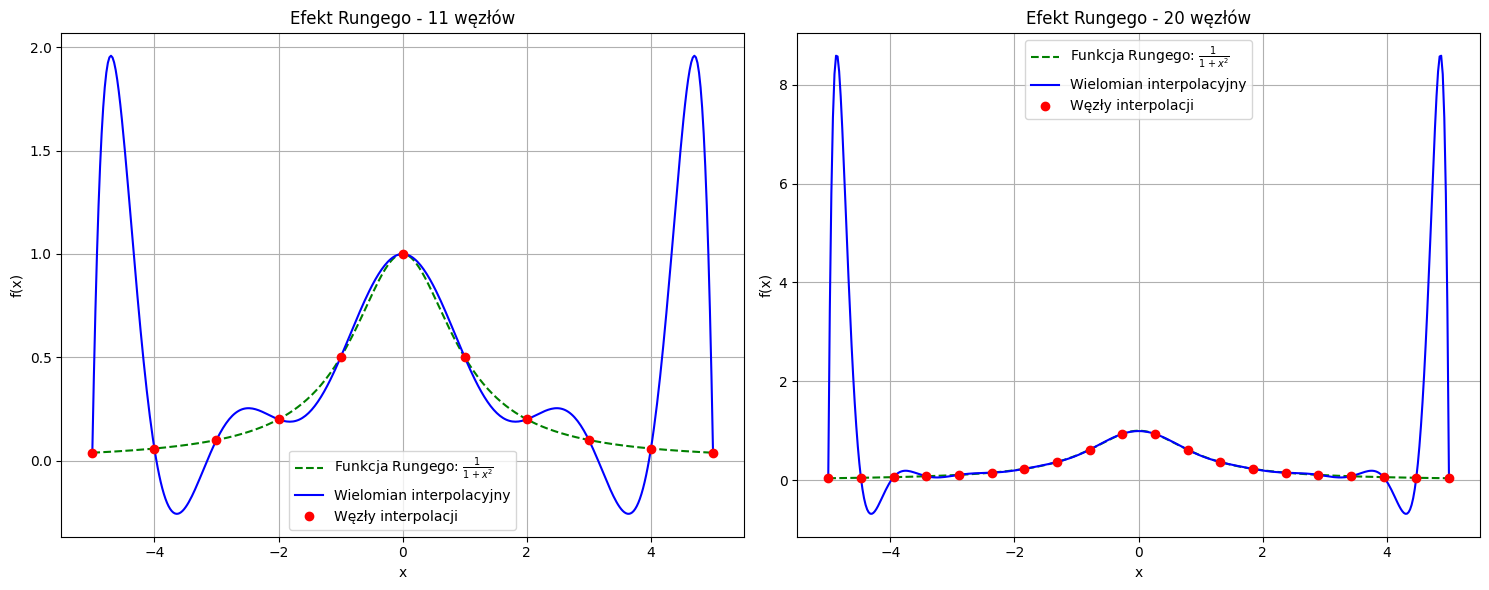

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

# Definicja funkcji:
def f(x):
    return 1 / (1 + x**2)

# Ustawienia przedziału i liczby węzłów
a, b = -5, 5
n_nodes = 11
n_nodes_more = 20

# Wersja 1
x_nodes = np.linspace(a, b, n_nodes)
y_nodes = f(x_nodes)

# Wersja 2 - więcej węzłow
x_nodes_more = np.linspace(a, b, n_nodes_more)
y_nodes_more = f(x_nodes_more)

# Generowanie gęstej siatki do wykresu
x_plot = np.linspace(a, b, 400)

# Wyznaczenie wielomianu interpolacyjnego dla obu zestawów węzłów
poly = lagrange(x_nodes, y_nodes)
y_poly = poly(x_plot)

poly_more = lagrange(x_nodes_more, y_nodes_more)
y_poly_more = poly_more(x_plot)

# Rysowanie wykresów
plt.figure(figsize=(15, 6))

# Pierwszy subplot
plt.subplot(1, 2, 1)
plt.plot(x_plot, f(x_plot), 'g--', label=r'Funkcja Rungego: $\frac{1}{1+x^2}$')
plt.plot(x_plot, y_poly, 'b-', label='Wielomian interpolacyjny')
plt.plot(x_nodes, y_nodes, 'ro', label='Węzły interpolacji')
plt.title(f"Efekt Rungego - {n_nodes} węzłów")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

# Drugi subplot - większa liczba węzłów
plt.subplot(1, 2, 2)
plt.plot(x_plot, f(x_plot), 'g--', label=r'Funkcja Rungego: $\frac{1}{1+x^2}$')
plt.plot(x_plot, y_poly_more, 'b-', label='Wielomian interpolacyjny')
plt.plot(x_nodes_more, y_nodes_more, 'ro', label='Węzły interpolacji')
plt.title(f"Efekt Rungego - {n_nodes_more} węzłów")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Efekt Rungego w Interpolacji Wielomianowej

**Efekt Rungego** to zjawisko, w którym wielomian interpolacyjny wykazuje silne oscylacje, zwłaszcza na krańcach przedziału interpolacji. Problem ten pojawia się głównie przy równomiernie rozmieszczonych węzłach oraz przy użyciu wielomianów wysokiego stopnia.


Rozważmy funkcję:

$$
f(x) = \frac{1}{1+x^2}.
$$

Interpolując tę funkcję na przedziale $[-5, 5]$ przy użyciu równomiernie rozmieszczonych węzłów, zauważamy, że:

- **Węzły interpolacji** są wybierane równomiernie, czyli:

  $$
  x_i = -5 + i \cdot \Delta x, \quad i = 0, 1, \dots, n-1,
  $$

  gdzie $\Delta x = \frac{10}{n-1}$.

- **Wielomian interpolacyjny** przechodzi dokładnie przez punkty $(x_i, f(x_i))$, ale na krańcach przedziału pojawiają się duże oscylacje – wielomian zaczyna „przeskakiwać” nad i pod wartością funkcji oryginalnej.

## Przyczyny efektu Rungego

1. **Wysoki stopień wielomianu:**  
   Dla $n$ węzłów interpolacyjnych wielomian ma stopień $n-1$. Wraz ze wzrostem $n$ wielomian staje się coraz bardziej skomplikowany, co może prowadzić do gwałtownych zmian wartości na krańcach przedziału.

2. **Równomierne rozmieszczenie węzłów:**  
   Równomierne rozmieszczenie nie zawsze jest optymalne dla funkcji, które wykazują duże zmiany w obrębie przedziału. Aby złagodzić efekt Rungego, często stosuje się węzły Czebyszewa, które są zagęszczone na krańcach przedziału.

3. **Zbieżność interpolacji:**  
   Chociaż wielomian interpolacyjny dokładnie przechodzi przez wszystkie węzły, nie zawsze zapewnia on jednostajną zbieżność do funkcji oryginalnej, szczególnie na krańcach przedziału.

## Podsumowanie

- **Efekt Rungego** występuje, gdy interpolacja wielomianowa przy równomiernie rozmieszczonych węzłach prowadzi do niepożądanych oscylacji, zwłaszcza przy użyciu wielomianów wysokiego stopnia.
- Przykładem jest funkcja

  $$
  f(x) = \frac{1}{1+x^2},
  $$

  gdzie wielomian interpolacyjny może znacznie odbiegać od funkcji oryginalnej na krańcach przedziału.
- Aby zmniejszyć efekt Rungego, można zastosować węzły Czebyszewa lub techniki interpolacji oparte na sklejanych wielomianach.

Takie podejście pokazuje, że „co za dużo, to niezdrowo” ma zastosowanie również w interpolacji – zbyt wysoki stopień wielomianu nie gwarantuje lepszej aproksymacji funkcji.